In [1]:
##imports -- run first thing!
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##clear PT.csv, L_obs.csv, L_obs_Norm.csv before running full program
##we're not using them in this rewrite but eehhhhh just to have
open('PT.csv', 'w').close()  
open('L_obs.csv', 'w').close()
open('L_obs_Norm.csv', 'w').close()

Text(0, 0.5, 'luminosity(ergs)')

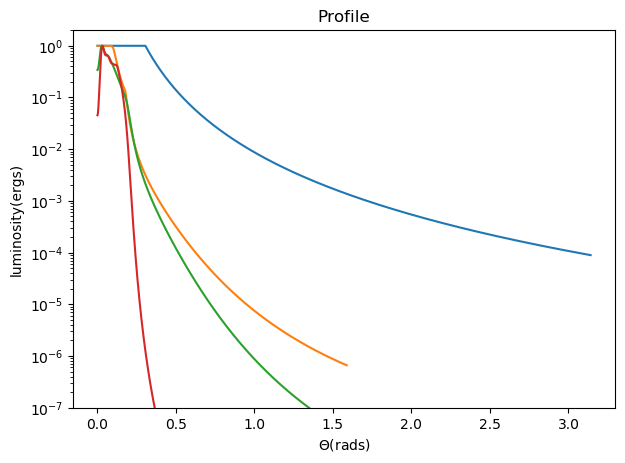

In [7]:
##### Plotter #####

Profile1 = pd.read_csv('MCprofileAnalytic.csv', sep = ',', header = None, names = ['theta','L'])
    #3-piece piecewise function using q comparison to epsilon, constant gamma
Profile2 = pd.read_csv('MCprofileFitIntegral_gamma2-6.csv', sep = ',', header = None, names = ['theta','L'])
Profile3 = pd.read_csv('MCprofileFitIntegral_gamma3.csv', sep = ',', header = None, names = ['theta','L'])
Profile4 = pd.read_csv('MCprofileFitIntegral_gamma5.csv', sep = ',', header = None, names = ['theta','L'])
Profile5 = pd.read_csv('MCprofileFitIntegral_gamma7.csv', sep = ',', header = None, names = ['theta','L'])
Profile6 = pd.read_csv('MCprofileFitIntegral_gamma9.csv', sep = ',', header = None, names = ['theta','L'])
Profile7 = pd.read_csv('MCprofileFitIntegral_gamma11.csv', sep = ',', header = None, names = ['theta','L'])
    #double integral using analytically fitted epsilon and gamma
    #gamma_min is the last number of file name
Profile8 = pd.read_csv('MCprofileR_x0_y2.csv', sep = ',', header = None, names = ['theta','L'])
Profile9 = pd.read_csv('MCprofileR_x1_yn3.csv', sep = ',', header = None, names = ['theta','L'])

fig = plt.figure(figsize=(7,5), dpi=100)
plt.plot(Profile1['theta'],Profile1['L'])
plt.plot(Profile2['theta'],Profile2['L'])
plt.plot(Profile8['theta'],Profile8['L'])
plt.plot(Profile9['theta'],Profile9['L'])

plt.yscale('log')
plt.ylim((10.0**(-7)),2)
plt.title('Profile')
plt.xlabel('$\Theta$(rads)')
plt.ylabel('luminosity(ergs)')

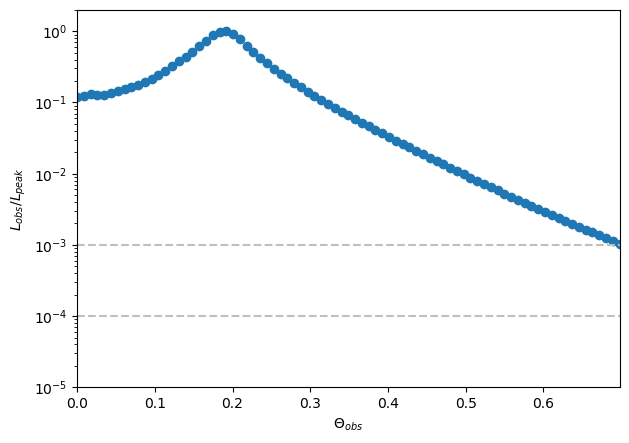

In [36]:
##### 2017 paper program #####
##declares
fig = plt.figure(figsize=(7,5), dpi=100)

theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [2.6] #,3,5,7,9,11]

##formula stuff
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))
Rx = 2.0
Ry = 2.0

#Rtheta = (Gtheta['gamma'][0:GminFar]**Ry)*(Ltheta['L'][0:GminFar]**Rx)

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (41*np.pi/180)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
#            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((Gtheta['gamma'][0:GminFar]**Ry)*(Ltheta['L'][0:GminFar]**Rx))*((1-(Btheta*cosalph))**4)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/360 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(361,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:361, 1]), x = (PT[0:361,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(0.5*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(82,2)
    Nval = max(Lo[0:82,1])
    LoN = Lo[0:82,1]/Nval
    
    ##Graphing of Normalized Function
    plt.ylabel('$L_{obs} / L_{peak}$')
    plt.yscale("log")
    plt.ylim(.00001, 2)
    plt.xlim(0,0.698131701)
    plt.xlabel('$\Theta_{obs}$')
    x = np.pi*Lo[0:82,0]/180
    y = LoN[0:82]
    plt.scatter(x,y,label='$\Gamma_{min}=$' + str(inmin))
    plt.plot([0,50],[0.001,0.001],color='0.75', linestyle='dashed')
    plt.plot([0,50],[0.0001,0.0001],color='0.75', linestyle='dashed')

#plt.savefig('2021intgammas.png')

In [37]:
MCprofile = open("MCprofileg26R_x2_y2.csv", "w")
i=0
while (i < len(LoN)):
    MCprofile.write(str(Lo[i,0]*np.pi/180) + "," + str(LoN[i]) + "\n")
    i+=1
MCprofile.close()

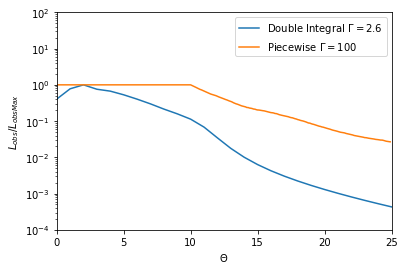

In [2]:
##### Beniamini et. al 2018 #####

#Integral Light Curve for Gamma = 2.6
IGamma = pd.read_csv('G2-6.csv', sep = ',', header = None, names = ['theta','L'])
NGammaVal = max(IGamma['L'])
NGamma = IGamma['L']/NGammaVal

#Simulation Structure and (Re)normalization
Etheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','G'])
Nval = max(Gtheta['G'])
NGtheta = Gtheta['G']/Nval
i = 0
RNE_arr = np.array([])
while (i <= 250):
    if (Etheta['L'][i]/0.100675051) > 1:
        RNEtheta_i = 1.0
    else:
        RNEtheta_i = Etheta['L'][i]/0.100675051
    RNE_arr_i = np.array([RNEtheta_i])
    RNE_arr = np.append(RNE_arr, RNE_arr_i)
    i = i+1
RNE = RNE_arr.reshape(251,1)

#Piecewise Array Generation
pw_arr = np.array([])
Gamma = 100
theta_core = 10.0
theta_o = 0.0
while (theta_o <= 25.0):
    if theta_o < theta_core:
        y = 1
    elif theta_core < theta_o < 2*theta_core:
        q = (theta_o-theta_core)*Gamma
        y = q**(-4)
    elif 2*theta_core < theta_o:
        q = (theta_o-theta_core)*Gamma
        y = (q**(-6))*((theta_core*Gamma)**2)
    pw_arr_i = np.array([theta_o, y])
    pw_arr = np.append(pw_arr, pw_arr_i, 0)
    theta_o = theta_o + 0.1
PW = pw_arr.reshape(250,2)

#Piecewise-Structure Max Comparison ReNorm (1) and AsIs (2)
i=0
CompPW1_arr = np.array([])
CompPW2_arr = np.array([])
while (i <= 249):
    Cmax1 = max(RNE[i],PW[i,1])
    Cmax2 = max(Etheta['L'][i],PW[i,1])
    CompPW1_arr_i = np.array([PW[i,0], Cmax1])
    CompPW1_arr = np.append(CompPW1_arr, CompPW1_arr_i, 0)
    CompPW2_arr_i = np.array([PW[i,0], Cmax2])
    CompPW2_arr = np.append(CompPW2_arr, CompPW2_arr_i, 0)
    i+=1
CPW1 = CompPW1_arr.reshape(250,2)
CPW2 = CompPW2_arr.reshape(250,2)

#Graphing    
plt.ylabel('$L_{obs} / L_{obsMax}$')
plt.yscale("log")
plt.ylim(.0001,100)
plt.xlim(0,25)
plt.xlabel('$\Theta$')
#x1 = PW[0:250,0]
#y1 = PW[0:250,1]
#x2 = Etheta['theta']
#y2 = Etheta['L']
#x6 = Gtheta['theta']
#y6 = NGtheta
x3 = IGamma['theta']
y3 = NGamma
x5 = CPW1[0:250,0]
y5 = CPW1[0:250,1]
#plt.plot(x1,y1,label='PW Function $\Gamma=2.6$')
plt.plot(x3,y3,label='Double Integral $\Gamma=2.6$')
#plt.plot(x2,y2,label='Jet Structure $dE/d\Omega$')
#plt.plot(x6,y6,label='Jet Structure $\Gamma_{0}$')
plt.plot(x5,y5,label='Piecewise $\Gamma= $' + str(Gamma))
plt.legend(loc="best")

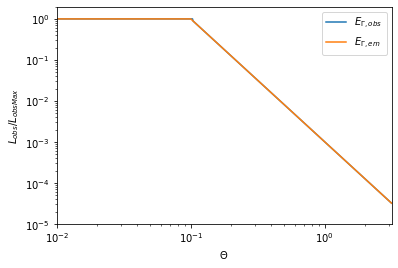

In [7]:
##### Beniamini & Nakar 2018 #####

#Piecewise Parameters
eps0 = 1.0
gam0 = 300.0
theta0 = 0.1 #radians
theta = 0.0 #radians
alpha = beta = 3.0
eps_arr = np.array([])
gam_arr = np.array([])

while (theta <= 3.142):
    if theta <= theta0:
        epsTheta = eps0
        gamTheta = 1+(gam0-1)
    elif theta0 < theta:
        epsTheta = eps0*((theta/theta0)**(-1*alpha))
        gamTheta = 1+(gam0-1)*((theta/theta0)**(-1*beta))
    eps_arr_i = np.array([theta, epsTheta])
    eps_arr = np.append(eps_arr, eps_arr_i, 0)
    gam_arr_i = np.array([theta,gamTheta])
    gam_arr = np.append(gam_arr,gam_arr_i,0)
    theta = theta+0.001
Epsilon = eps_arr.reshape(3143,2)
Gamma = gam_arr.reshape(3143,2)

#Piecewise Array Generation
pw_arr = np.array([])
thetaObs = 0.0
while (thetaObs <= 3.142): #radians
    if thetaObs <= (theta0+0.004):
        Egam = 1
    elif abs(thetaObs-(theta0+0.004)) < theta0:
        q = abs(thetaObs-theta0)*gam0
        Egam = q**(-4)
    elif theta0 < abs(thetaObs-theta0):
        q = abs(thetaObs-theta0)*gam0
        Egam = (q**(-6))*((theta0*gam0)**2)
    pw_arr_i = np.array([thetaObs, Egam])
    pw_arr = np.append(pw_arr, pw_arr_i, 0)
    thetaObs = thetaObs + 0.001
PW = pw_arr.reshape(3143,2)

#Piecewise-ParameterEpsilon Max Comparison
i=0
CompPW_arr = np.array([])
while (i <= 3142):
    Cmax = max(Epsilon[i,1],PW[i,1])
    CompPW_arr_i = np.array([PW[i,0], Cmax])
    CompPW_arr = np.append(CompPW_arr, CompPW_arr_i, 0)
    i+=1
CPW = CompPW_arr.reshape(3143,2)

#Emitted Array Generation
etaGam = 0.15
Eem = etaGam*4*np.pi*Epsilon[0:3143,1]
NEemVal = max(Eem)
NEem = Eem/NEemVal

#Graphing
plt.ylabel('$L_{obs} / L_{obsMax}$')
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.01,3.142)
plt.ylim(0.00001,2)
plt.xlabel('$\Theta$')
x1 = CPW[0:3143,0]
y1 = CPW[0:3143,1]
x4 = Epsilon[0:3143,0]
y4 = NEem
plt.plot(x1,y1,label='$E_{\Gamma, obs}$')
plt.plot(x4, y4,label='$E_{\Gamma, em}$')
plt.legend(loc="best")

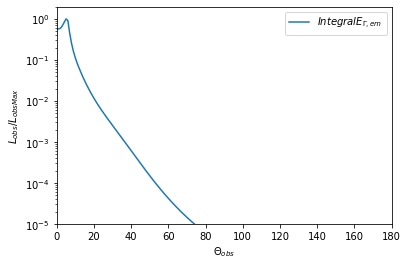

In [5]:
##### 2017 paper program #####
##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [2.6,3,5,7,9,11]

##formula stuff
Gtheta = pd.read_csv('func_gamma.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('func_epsilon.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (np.pi)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(1*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(181,2)
    Nval = max(Lo[0:181,1])
    LoN = Lo[0:181,1]/Nval
plt.ylabel('$L_{obs} / L_{obsMax}$')
plt.yscale("log")
plt.ylim(.00001, 2)
plt.xlim(0,180)
plt.xlabel('$\Theta_{obs}$')
x = Lo[0:181,0]
y = LoN[0:181]
plt.plot(x,y,label='$Integral E_{\Gamma, em}$')
plt.legend(loc="best")

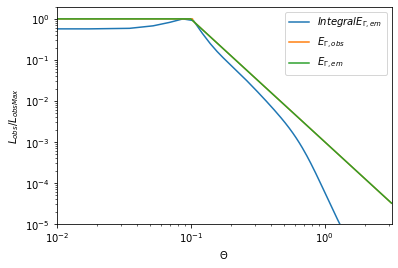

In [9]:
#Graphing
plt.ylabel('$L_{obs} / L_{obsMax}$')
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.01,3.142)
plt.ylim(0.00001,2)
plt.xlabel('$\Theta$')
x1 = CPW[0:3143,0]
y1 = CPW[0:3143,1]
x4 = Epsilon[0:3143,0]
y4 = NEem
x = Lo[0:181,0]
y = LoN[0:181]
plt.plot(x*(np.pi/180),y,label='$Integral E_{\Gamma, em}$')
plt.plot(x1,y1,label='$E_{\Gamma, obs}$')
plt.plot(x4, y4,label='$E_{\Gamma, em}$')
plt.legend(loc="best")